# PREDICTION NOMBRE DE PASSAGERS DES LIGNES DE BUS

#### UNDERSTAND DATA

In [78]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vacances_scolaires_france import SchoolHolidayDates
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
import holidays
from dateutil.easter import easter
import calendar
import datetime

%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [108]:
passagers_df = pd.read_csv("data_passagers.csv")
passagers_df

,dateTime,weather,lineNumber,passengersNumber,lineType
0,2019-04-05,26,29,3032,daily
1,2019-04-05,26,42,418,daily
2,2019-04-05,26,40,2065,daily
3,2019-04-05,26,104,115,night
4,2019-04-05,26,27,2900,daily
...,...,...,...,...,...
37616,2023-03-19,26,26,2650,daily
37617,2023-03-19,26,31,905,daily
37618,2023-03-19,26,36,425,daily
37619,2023-03-19,26,41,273,daily


## EXPLORATORY DATA ANALYSIS

In [79]:
# 5 premieres lignes de notre jeu de donnees
passagers_df.head(5)

,dateTime,weather,lineNumber,passengersNumber,lineType,year,dateTimeMonth,dateTimeDay,dateTimeWeek,day_of_year,dateTimeDayofweek,dateTimeIs_sunday,is_holiday,dateTimeIs_schoolholiday,dateTimeIs_paques,dateTimeIs_grandsemaine,nbPassenger_lag1,nbPassenger_lag2,nbPassenger_lag3,Dweather
0,2019-04-05,26,29,3032,1,2019,4,5,14,95,5,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0
22,2019-04-05,26,33,4880,1,2019,4,5,14,95,5,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0
23,2019-04-05,26,16,1000,1,2019,4,5,14,95,5,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0
24,2019-04-05,26,14,4355,1,2019,4,5,14,95,5,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0
25,2019-04-05,26,109,36,0,2019,4,5,14,95,5,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0


In [80]:
# 5 dernieres lignes de notre jeu de donnees
passagers_df.tail(5)

,dateTime,weather,lineNumber,passengersNumber,lineType,year,dateTimeMonth,dateTimeDay,dateTimeWeek,day_of_year,dateTimeDayofweek,dateTimeIs_sunday,is_holiday,dateTimeIs_schoolholiday,dateTimeIs_paques,dateTimeIs_grandsemaine,nbPassenger_lag1,nbPassenger_lag2,nbPassenger_lag3,Dweather
37593,2023-03-19,26,13,6060,1,2023,3,19,11,78,7,1,0,0,0,False,784.0,230.0,196.0,1.0
37592,2023-03-19,26,6,21,1,2023,3,19,11,78,7,1,0,0,0,False,3684.0,345.0,1074.0,1.0
37619,2023-03-19,26,41,273,1,2023,3,19,11,78,7,1,0,0,0,False,1883.0,7073.0,1377.0,1.0
37605,2023-03-19,26,27,678,1,2023,3,19,11,78,7,1,0,0,0,False,1074.0,1109.0,458.0,1.0
37620,2023-03-19,26,46,130,1,2023,3,19,11,78,7,1,0,0,0,False,4350.0,1410.0,2650.0,1.0


In [81]:
passagers_df.describe()

,dateTime,weather,lineNumber,passengersNumber,lineType,year,dateTimeMonth,dateTimeDay,dateTimeWeek,day_of_year,dateTimeDayofweek,dateTimeIs_sunday,is_holiday,dateTimeIs_schoolholiday,dateTimeIs_paques,nbPassenger_lag1,nbPassenger_lag2,nbPassenger_lag3,Dweather
count,37621,37621.000000,37621.000000,37621.000000,37621.000000,37621.000000,37621.000000,37621.000000,37621.0,37621.000000,37621.000000,37621.000000,37621.0,37621.000000,37621.000000,37621.000000,37621.000000,37621.000000,37621.000000
mean,2021-03-16 21:38:15.728449536,24.010579,31.744903,2067.940990,0.928896,2020.669626,6.978230,15.766779,28.479759,196.950267,4.044390,0.126419,0.0,0.364371,0.002392,2068.069416,2068.118808,2068.198059,2.472821
min,2019-04-05 00:00:00,11.000000,5.000000,1.000000,0.000000,2019.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2020-01-24 00:00:00,13.000000,17.000000,365.000000,1.000000,2020.000000,4.000000,8.000000,17.0,119.000000,2.000000,0.000000,0.0,0.000000,0.000000,365.000000,365.000000,365.000000,1.000000
50%,2021-06-19 00:00:00,24.000000,28.000000,1241.000000,1.000000,2021.000000,7.000000,16.000000,30.0,205.000000,4.000000,0.000000,0.0,0.000000,0.000000,1241.000000,1242.000000,1243.000000,2.000000
75%,2022-04-05 00:00:00,26.000000,38.000000,2558.000000,1.000000,2022.000000,10.000000,23.000000,40.0,279.000000,6.000000,0.000000,0.0,1.000000,0.000000,2558.000000,2557.000000,2557.000000,3.000000
max,2023-03-19 00:00:00,62.000000,110.000000,16124.000000,1.000000,2023.000000,12.000000,31.000000,52.0,365.000000,7.000000,1.000000,0.0,1.000000,1.000000,16124.000000,16124.000000,16124.000000,5.000000
std,NaN,11.734847,23.335248,2494.733418,0.257002,1.206142,3.204932,8.724597,13.916484,97.602046,1.965112,0.332325,0.0,0.481260,0.048853,2494.569647,2494.484445,2494.288350,1.309247


In [109]:
passagers_df.describe(include='object')

,dateTime,lineType
count,37621,37621
unique,1187,2
top,2019-04-05,daily
freq,39,34946


In [93]:
passagers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37621 entries, 0 to 37620
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dateTime          37621 non-null  object
 1   weather           37621 non-null  int64 
 2   lineNumber        37621 non-null  int64 
 3   passengersNumber  37621 non-null  int64 
 4   lineType          37621 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.4+ MB


In [100]:
# Convertir la colonne 'dateTime' en datetime
passagers_df['dateTime'] = pd.to_datetime(passagers_df['dateTime'])

passagers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37621 entries, 0 to 37620
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateTime          37621 non-null  datetime64[ns]
 1   weather           37621 non-null  int64         
 2   lineNumber        37621 non-null  int64         
 3   passengersNumber  37621 non-null  int64         
 4   lineType          37621 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.4+ MB


In [83]:
pd.DataFrame(passagers_df.isnull().sum(), columns=["Nombre valeurs Manquantes"])


,Nombre valeurs Manquantes
dateTime,0
weather,0
lineNumber,0
passengersNumber,0
lineType,0
year,0
dateTimeMonth,0
dateTimeDay,0
dateTimeWeek,0
day_of_year,0


<Axes: >

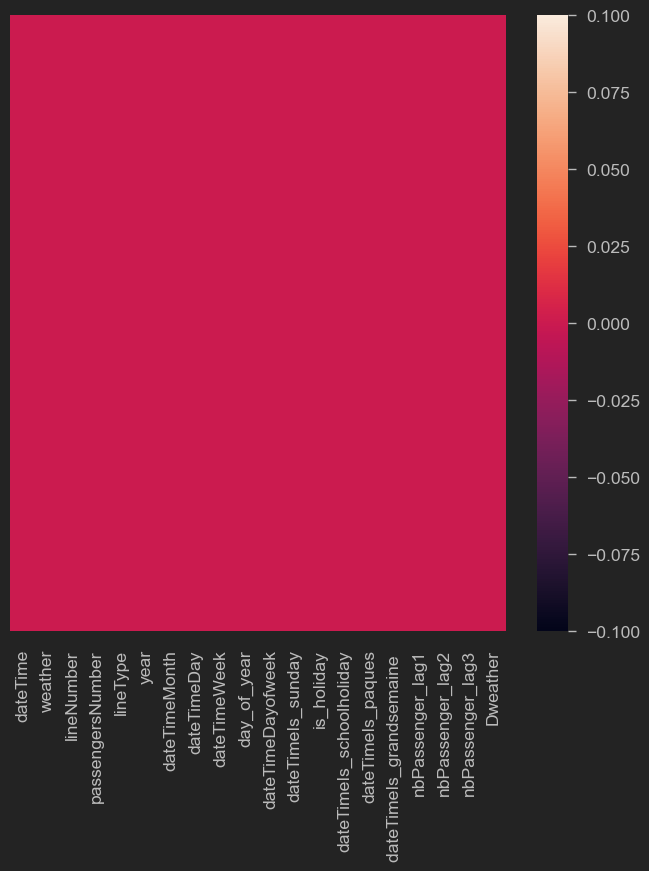

In [84]:
plt.figure(figsize=(8,8))
sns.heatmap(passagers_df.isnull(), yticklabels=False)

## Data Visualisation

[[<matplotlib.axis.XTick at 0x20026d4b7d0>,

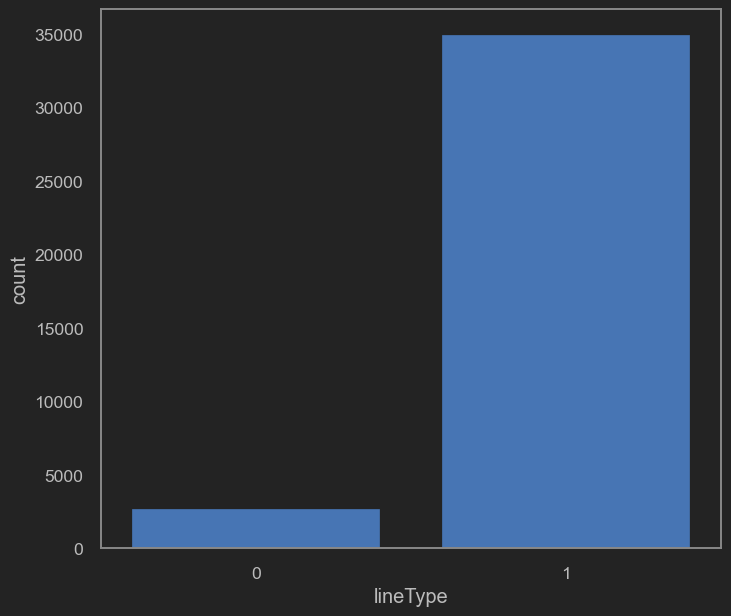

In [85]:

sns.countplot(x=passagers_df["lineType"]).set(xticks=[0,1])

[[<matplotlib.axis.XTick at 0x20026d4e6f0>,

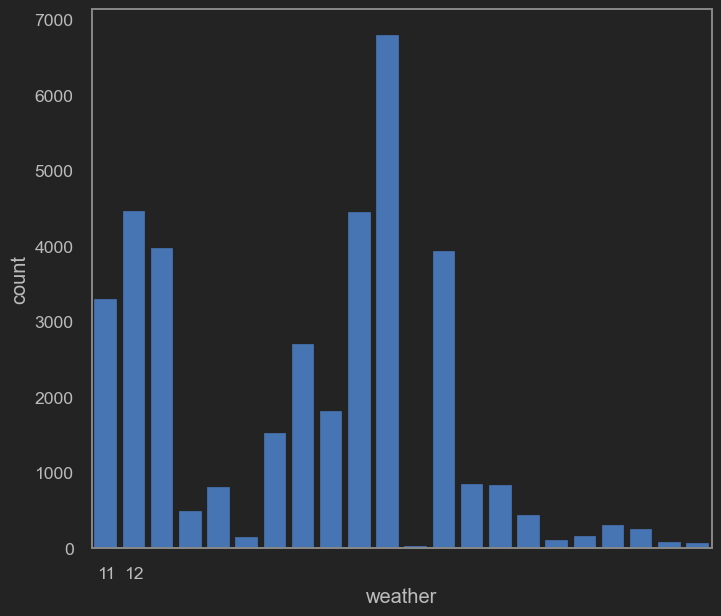

In [86]:
sns.countplot(x=passagers_df["weather"]).set(xticks=[0,1])

[[<matplotlib.axis.XTick at 0x200270cb500>,

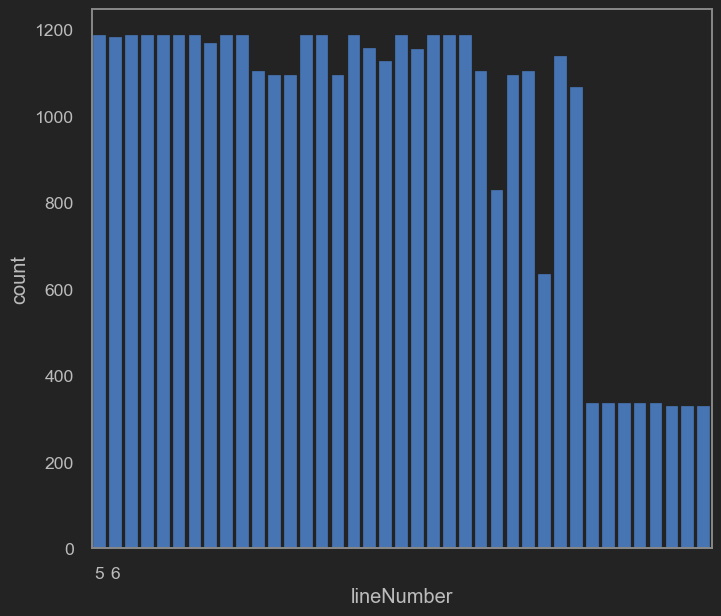

In [87]:
sns.countplot(x=passagers_df["lineNumber"]).set(xticks=[0,1])

In [7]:
# Conversion de la colonne datetime
#passagers_df['dateTime'] = pd.to_dateTime(passagers_df['dateTime'])

# Extraction de l'année
passagers_df['year'] = passagers_df['dateTime'].dt.year

# Grouper par année et numéro de ligne de bus pour calculer le total des passagers
grouped = passagers_df.groupby(['year', 'lineNumber'])['passengersNumber'].sum().reset_index()



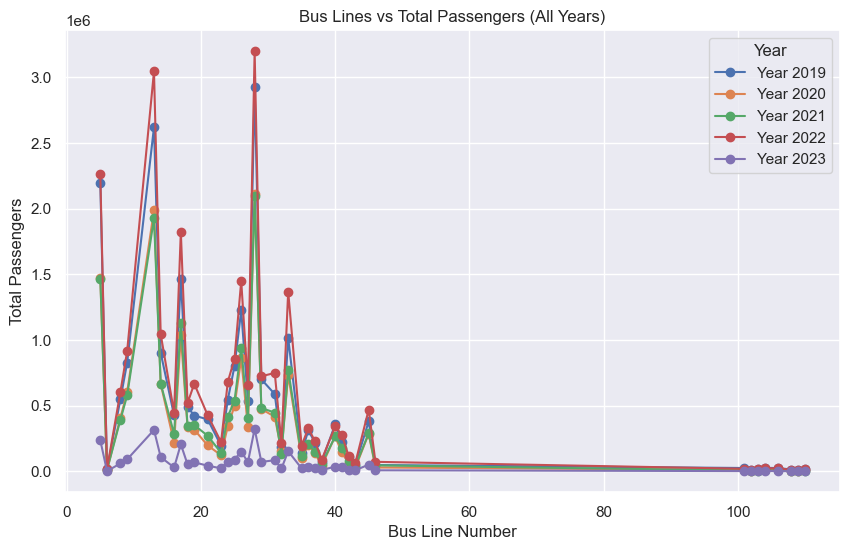

In [8]:
# Tracer un graphique combiné
plt.figure(figsize=(10, 6))  # Taille du graphique

# Boucle sur chaque année pour tracer les données correspondantes
unique_years = grouped['year'].unique()
for year in unique_years:
    # Filtrer les données pour l'année en cours
    year_data = grouped[grouped['year'] == year]
    
    # Tracer les lignes avec une couleur différente pour chaque année
    plt.plot(
        year_data['lineNumber'],
        year_data['passengersNumber'],
        marker='o',
        label=f"Year {year}"
    )

# Personnalisation du graphique
plt.title("Bus Lines vs Total Passengers (All Years)")
plt.xlabel("Bus Line Number")
plt.ylabel("Total Passengers")
plt.legend(title="Year")  # Légende avec un titre
plt.grid(True)

# Afficher le graphique
plt.show()

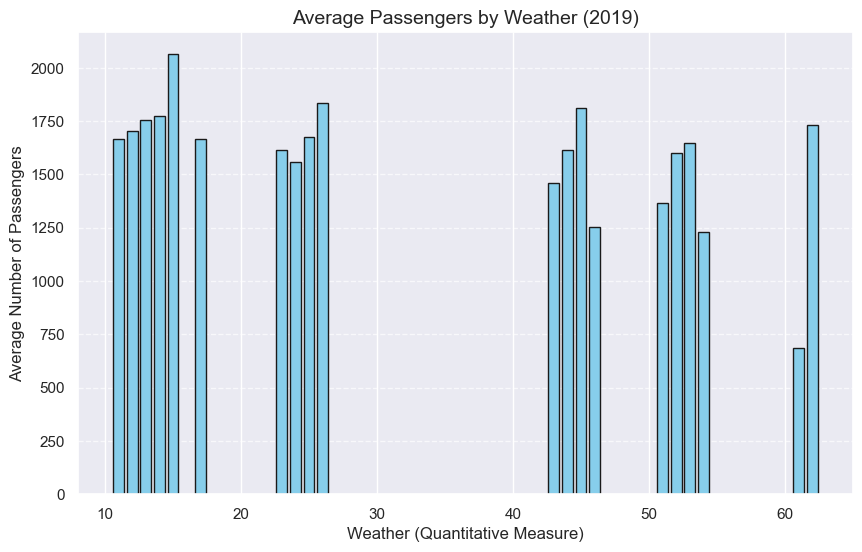

In [26]:
# Filtrer pour l'année 2019
passagers_df_2019 =passagers_df[passagers_df['dateTime'].dt.year == 2020]

# Calculer la moyenne des passagers par météo
weather_passengers =passagers_df_2019.groupby('weather')['passengersNumber'].mean().reset_index()

# Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(weather_passengers['weather'], weather_passengers['passengersNumber'], color='skyblue', edgecolor='k')

# Personnalisation du graphique
plt.title("Average Passengers by Weather (2019)", fontsize=14)
plt.xlabel("Weather (Quantitative Measure)", fontsize=12)
plt.ylabel("Average Number of Passengers", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()

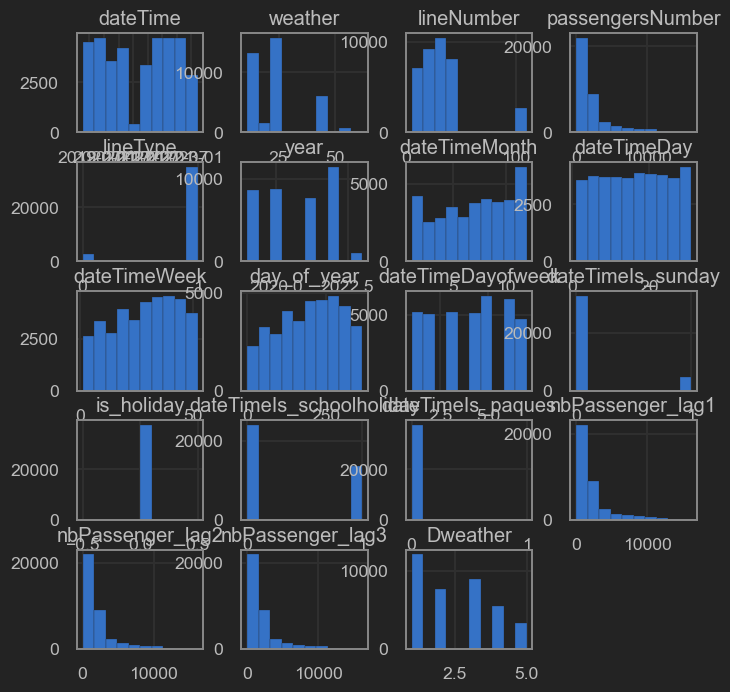

In [88]:
passagers_df.hist(figsize=(8,8))
plt.show()

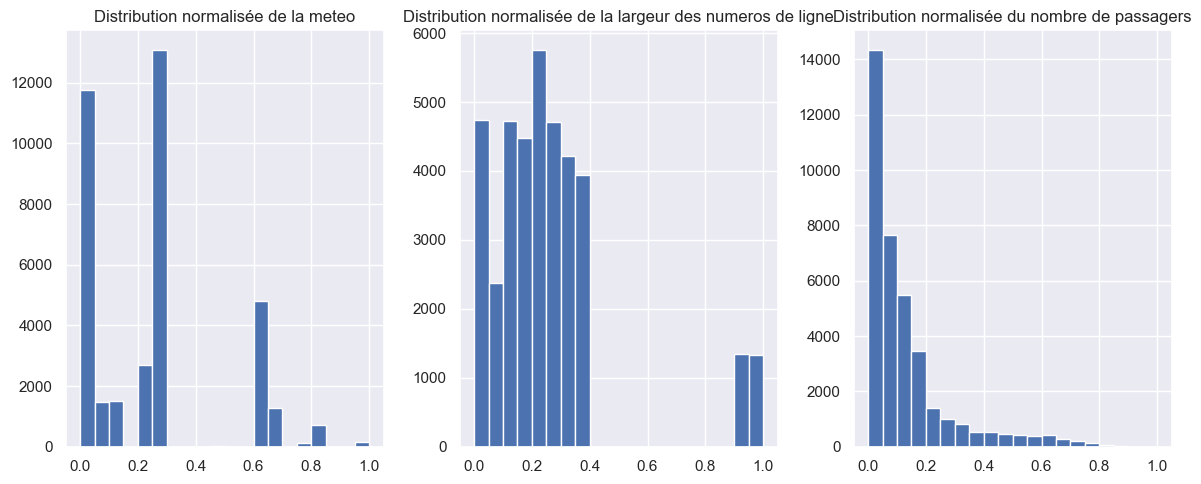

In [21]:
# Normalisation
X = passagers_df[passagers_df.columns[1:4]]
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

axs[0].hist(X_norm[:, 0], bins=20)
axs[0].set_title('Distribution normalisée de la meteo')
axs[1].hist(X_norm[:, 1], bins=20)
axs[1].set_title('Distribution normalisée de la largeur des numeros de ligne')
axs[2].hist(X_norm[:, 2], bins=20)
axs[2].set_title('Distribution normalisée du nombre de passagers')
fig.tight_layout()
plt.show()

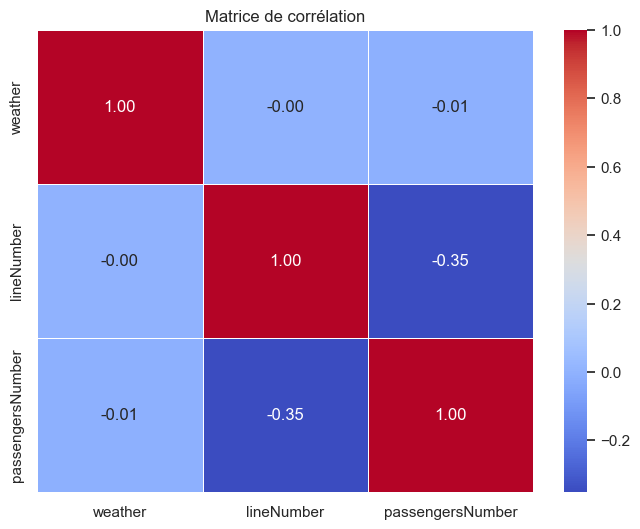

In [24]:
corr_matrix = passagers_df[passagers_df.columns[1:4]].corr()

# Étape 2 : Tracer la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

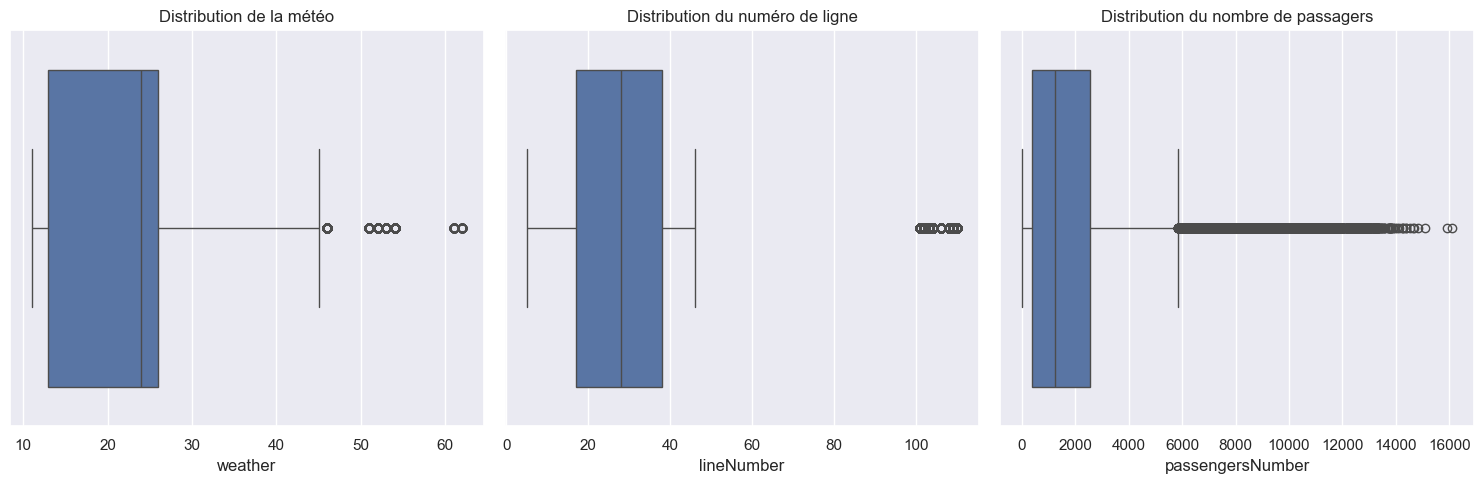

In [27]:
# Création des sous-parcelles
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Tracer les boîtes à moustaches avec Seaborn en spécifiant `ax`
sns.boxplot(data=passagers_df, x="weather", ax=axs[0])
axs[0].set_title('Distribution de la météo')

sns.boxplot(data=passagers_df, x="lineNumber", ax=axs[1])
axs[1].set_title('Distribution du numéro de ligne')

sns.boxplot(data=passagers_df, x="passengersNumber", ax=axs[2])
axs[2].set_title('Distribution du nombre de passagers')

# Ajuster l'espacement
fig.tight_layout()
plt.show()

In [107]:
resyear = passagers_df.groupby('year').agg(total_passenger=('passengersNumber', 'sum'))
resyear

,total_passenger
year,
2019,21111151
2020,14663240
2021,15280654
2022,24216762
2023,2526201


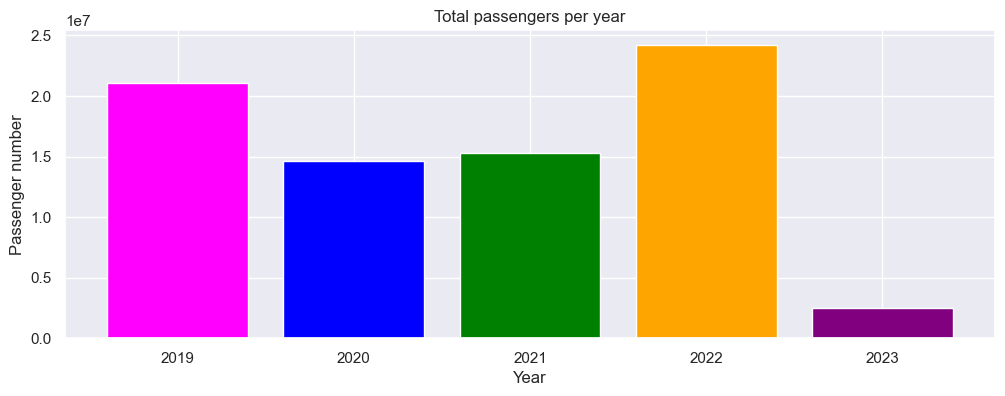

In [33]:
# Calculer le total des passagers par année
resyear = passagers_df.groupby('year').agg(total_passenger=('passengersNumber', 'sum'))

# Générer des couleurs aléatoires pour chaque barre


# Tracer le graphique avec des couleurs différentes
fig, axs = plt.subplots(1, 1, figsize=(12, 4))

axs.bar(resyear.index, resyear.total_passenger, color = ['magenta', 'blue', 'green', 'orange', 'purple'])
axs.set_title('Total passengers per year')
axs.set_xlabel('Year')
axs.set_ylabel('Passenger number')
plt.show()

In [112]:
res2019 = passagers_df.loc[passagers_df['dateTime'].dt.year == 2019, ].groupby('month').agg(total_passenger=('passengersNumber', 'sum'))
res2019

,total_passenger
month,
4,1758114
5,2485487
6,1765393
7,2458607
8,2568710
9,2489239
10,2602059
11,2487465
12,2496077


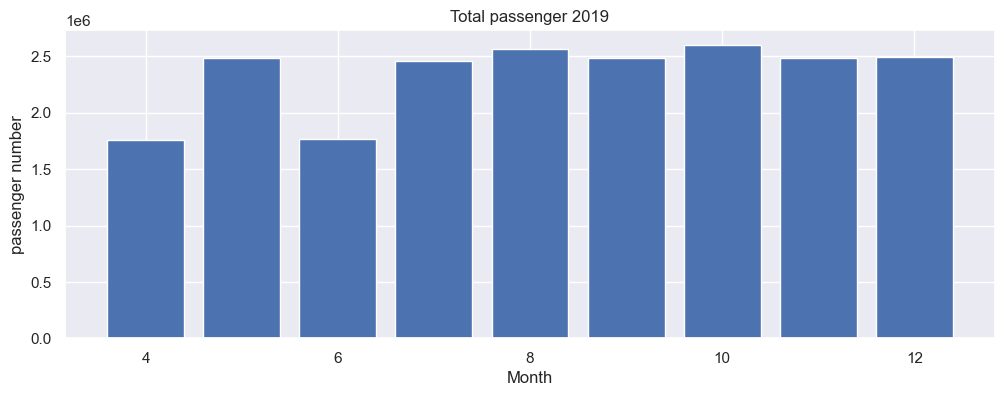

In [114]:
fig, axs = plt.subplots(1,1,figsize=(12, 4))

res2019 = passagers_df.loc[passagers_df['dateTime'].dt.year == 2019, ].groupby('month').agg(total_passenger=('passengersNumber', 'sum'))
axs.bar(res2019.index, res2019.total_passenger)
axs.set_title('Total passenger 2019')
axs.set_xlabel('Month')
axs.set_ylabel('passenger number')
plt.show()

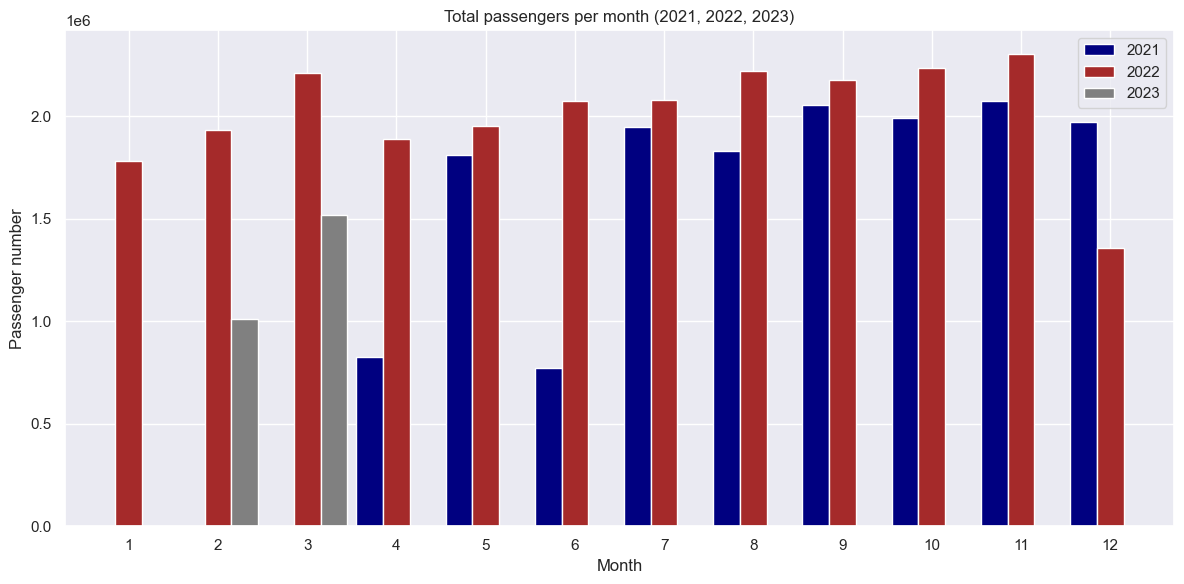

In [29]:
# Convertir la colonne 'dateTime' en datetime
passagers_df['dateTime'] = pd.to_datetime(passagers_df['dateTime'])


# Filtrer et grouper les données pour 2020 et 2021
res2019 = passagers_df.loc[passagers_df['dateTime'].dt.year == 2021, ].groupby(passagers_df['dateTime'].dt.month).agg(total_passenger=('passengersNumber', 'sum'))
res2020 = passagers_df.loc[passagers_df['dateTime'].dt.year == 2022].groupby(passagers_df['dateTime'].dt.month).agg(
    total_passenger=('passengersNumber', 'sum'))
res2021 = passagers_df.loc[passagers_df['dateTime'].dt.year == 2023].groupby(passagers_df['dateTime'].dt.month).agg(
    total_passenger=('passengersNumber', 'sum'))


# Création du graphique
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

# Tracer les barres pour 2019
axs.bar(
    res2019.index - 0.3,  # Décaler vers la gauche
    res2019.total_passenger,
    width=0.3,  # Réduire la largeur pour laisser de la place
    label='2021',
    color='navy'
)

# Tracer les barres pour 2020
axs.bar(
    res2020.index,  # Garder au centre
    res2020.total_passenger,
    width=0.3,  # Réduire la largeur pour laisser de la place
    label='2022',
    color='brown'
)

# Tracer les barres pour 2021
axs.bar(
    res2021.index + 0.3,  # Décaler vers la droite
    res2021.total_passenger,
    width=0.3,
    label='2023',
    color='grey'
)

# Ajouter le titre et les labels
axs.set_title('Total passengers per month (2021, 2022, 2023)')
axs.set_xlabel('Month')
axs.set_ylabel('Passenger number')
axs.set_xticks(range(1, 13))  # Assurer que tous les mois sont affichés
axs.legend()

plt.tight_layout()
plt.show()


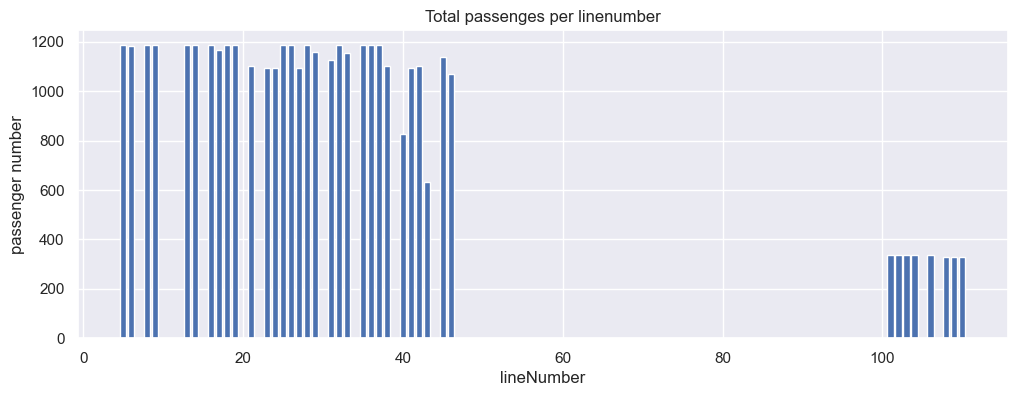

In [41]:
fig, axs = plt.subplots(1,1,figsize=(12, 4))

axs.bar(resline.index, resline.total_passenger)
axs.set_title('Total passenges per linenumber')
axs.set_xlabel('lineNumber')
axs.set_ylabel('passenger number')
plt.show()

In [34]:
reslinetype = passagers_df.groupby('lineType').agg(total_passenger=('passengersNumber', 'size'))
reslinetype

,total_passenger
lineType,
daily,34946
night,2675


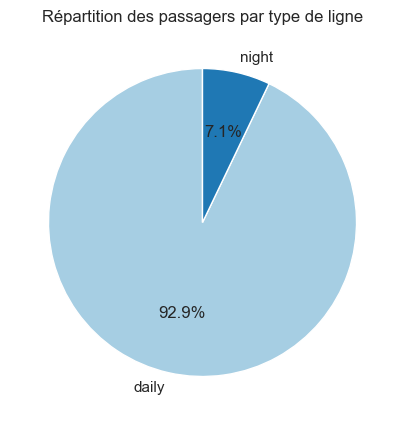

In [37]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Tracer le diagramme en pie
axs.pie(
    reslinetype.total_passenger, 
    labels=reslinetype.index, 
    autopct='%1.1f%%',  # Afficher les pourcentages avec une décimale
    startangle=90,      # Départ à 90° pour une meilleure orientation
    colors=plt.cm.Paired.colors  # Palette de couleurs
)

# Ajouter un titre
axs.set_title('Répartition des passagers par type de ligne')
plt.show()


## Data Augmentation

In [57]:
import holidays
# Conversion en type datetime
passagers_df['dateTime'] = pd.to_datetime(passagers_df['dateTime'])

# Jours fériés en France
fr_holidays = holidays.France()
d  =  SchoolHolidayDates () 

# Extraction d'autres composantes
# datetimemonth: le jour du mois
# dateTimeday: le jour de l'annee
passagers_df['year'] = passagers_df['dateTime'].dt.year  # Année
passagers_df['dateTimeMonth'] = passagers_df['dateTime'].dt.month  # Mois
passagers_df['dateTimeDay'] = passagers_df['dateTime'].dt.day  # Jour

# Extraire le numéro de la semaine
passagers_df['dateTimeWeek'] = passagers_df['dateTime'].dt.isocalendar().week

# Extraire le jour de l'annee (1 to 365)
passagers_df['day_of_year'] = passagers_df['dateTime'].apply(lambda x: x.timetuple().tm_yday)

# Extraire le jour de la semaine
passagers_df['dateTimeDayofweek'] = passagers_df['dateTime'].dt.dayofweek.apply(lambda x: calendar.day_name[x])

# Dimanche ou non
passagers_df['dateTimeIs_sunday'] = passagers_df['dateTime'].dt.dayofweek.apply(lambda x: 1 if x == 6 else 0)

# Jour ferie oui ou non 
passagers_df['is_holiday'] = passagers_df['dateTime'].dt.date.isin(fr_holidays)

# Vacances scolaires oui ou non
# Extraire les années présentes dans le DataFrame
years = passagers_df['year'].unique()

# Obtenir les dates des vacances scolaires pour chaque année et les combiner
school_holidays = SchoolHolidayDates()
vacation_days = set()
i = 0
for dat in passagers_df['dateTime']:
    holidays = school_holidays.is_holiday_for_zone(datetime.date(dat.year,dat.month,dat.day), "A")
    # Ajouter une colonne indiquant si la date est un jour de vacances scolaires
    passagers_df.loc[i, 'dateTimeIs_schoolholiday'] = holidays
    i+=1
# Jour de paque ou non
# Calculer les dates de Pâques pour chaque année et créer un dictionnaire
easter_dates = {year: easter(year) for year in years}

# Ajouter une colonne indiquant si la date est un jour de Pâques
passagers_df['dateTimeIs_paques'] = passagers_df['dateTime'].dt.date.apply(lambda x: x == easter_dates.get(x.year))
#

#Grande semaine 
# Calculer les plages de la "Grande Semaine" pour chaque année
semana_santa_ranges = {
    year: pd.date_range(start=easter(year) - pd.Timedelta(days=7), end=easter(year)).date
    for year in years
}

# Ajouter une colonne indiquant si la date est dans la "Grande Semaine"
passagers_df['dateTimeIs_grandsemaine '] = passagers_df['dateTime'].dt.date.apply(
    lambda x: x in semana_santa_ranges.get(x.year, [])
)

passagers_df.head(5)


,dateTime,weather,lineNumber,passengersNumber,lineType,year,dateTimeMonth,dateTimeDay,dateTimeWeek,day_of_year,dateTimeDayofweek,dateTimeIs_sunday,is_holiday,dateTimeIs_schoolholiday,dateTimeIs_paques,dateTimeIs_grandsemaine
0,2019-04-05,26,29,3032,daily,2019,4,5,14,95,Friday,0,False,False,False,False
1,2019-04-05,26,42,418,daily,2019,4,5,14,95,Friday,0,False,False,False,False
2,2019-04-05,26,40,2065,daily,2019,4,5,14,95,Friday,0,False,False,False,False
3,2019-04-05,26,104,115,night,2019,4,5,14,95,Friday,0,False,False,False,False
4,2019-04-05,26,27,2900,daily,2019,4,5,14,95,Friday,0,False,False,False,False


#### Ajout Variable issus du nombre de passager

In [58]:
# Sort data by dateTime for lag calculation
passagers_df = passagers_df.sort_values(by=['dateTime'])


# Add lag features
passagers_df['nbPassenger_lag1'] = passagers_df['passengersNumber'].shift(7)
passagers_df['nbPassenger_lag2'] = passagers_df['passengersNumber'].shift(14)
passagers_df['nbPassenger_lag3'] = passagers_df['passengersNumber'].shift(21)

# Replace NaN values in lag variables with the mean of their respective columns
passagers_df['nbPassenger_lag1'] = passagers_df['nbPassenger_lag1'].fillna(passagers_df['nbPassenger_lag1'].mean())
passagers_df['nbPassenger_lag2'] = passagers_df['nbPassenger_lag2'].fillna(passagers_df['nbPassenger_lag2'].mean())
passagers_df['nbPassenger_lag3'] = passagers_df['nbPassenger_lag3'].fillna(passagers_df['nbPassenger_lag3'].mean())

passagers_df.head(5)

,dateTime,weather,lineNumber,passengersNumber,lineType,year,dateTimeMonth,dateTimeDay,dateTimeWeek,day_of_year,dateTimeDayofweek,dateTimeIs_sunday,is_holiday,dateTimeIs_schoolholiday,dateTimeIs_paques,dateTimeIs_grandsemaine,nbPassenger_lag1,nbPassenger_lag2,nbPassenger_lag3
0,2019-04-05,26,29,3032,daily,2019,4,5,14,95,Friday,0,False,False,False,False,2068.069416,2068.118808,2068.198059
22,2019-04-05,26,33,4880,daily,2019,4,5,14,95,Friday,0,False,False,False,False,2068.069416,2068.118808,2068.198059
23,2019-04-05,26,16,1000,daily,2019,4,5,14,95,Friday,0,False,False,False,False,2068.069416,2068.118808,2068.198059
24,2019-04-05,26,14,4355,daily,2019,4,5,14,95,Friday,0,False,False,False,False,2068.069416,2068.118808,2068.198059
25,2019-04-05,26,109,36,night,2019,4,5,14,95,Friday,0,False,False,False,False,2068.069416,2068.118808,2068.198059


### Ajout des donnees Meteorologiques

In [59]:
dictA = {
    1: "Très pluvieux",
    2: "Pluvieux",
    3: "Très nuageux",
    4: "Partiellement nuageux",
    5:"Ensoleillé"
}

dictB = {
1:["Nuboso con tormenta", "Muy nuboso con nieve escasa", "Nuboso con tormenta y lluvia escasa noche",
    "Nuboso con tormenta y lluvia escasa", "Nuboso con tormenta noche", "Cubierto con nieve escasa",  
    "Muy nuboso con tormenta y lluvia escasa", "Cubierto con lluvia", "Intervalos nubosos con tormenta y lluvia escasa",
      "Cubierto con tormenta y lluvia escasa", "Cubierto con nieve", "Nuboso con nieve noche", "Muy nuboso con tormenta", 
      "Nuboso con nieve",  "Muy nuboso con nieve", "Cubierto con tormenta",  "Intervalos nubosos con tormenta y lluvia escasa noche", 
      "Muy nuboso con lluvia"],
2:["Intervalos nubosos con tormenta noche", "Intervalos nubosos con nieve escasa", "Nuboso con lluvia noche", 
   "Nuboso con lluvia", "Intervalos nubosos con nieve noche", "Cubierto con lluvia escasa", "Intervalos nubosos con nieve", 
   "Intervalos nubosos con tormenta", "Nuboso con nieve escasa", "Intervalos nubosos con nieve escasa noche", 
   "Nuboso con nieve escasa noche", "Muy nuboso con lluvia escasa"],
3:["Intervalos nubosos con lluvia noche", "Intervalos nubosos con lluvia", "Nuboso con lluvia escasa noche", 
   "Nuboso con lluvia escasa", "Muy nuboso", "Nuboso", "Intervalos nubosos con lluvia escasa",  "Cubierto", 
   "Intervalos nubosos con lluvia escasa noche"],
4:["Nuboso noche", "Nubes altas", "Intervalos nubosos", "Intervalos nubosos noche", "Nubes altas noche"],
5:["Despejado", "Poco nuboso", "Despejado noche", "Poco nuboso noche"]
}

dictC = {
12 : "Muy nuboso con lluvia escasa",
13 : "Intervalos nubosos",
43 : "Intervalos nubosos con lluvia escasa",
26 : "Cubierto con lluvia",
25 :  "Muy nuboso con lluvia",
11 :  "Despejado",
62 :  "Nuboso con tormenta y lluvia escasa",
24 : "Nuboso con lluvia",
23 : "Intervalos nubosos con lluvia",
61 : "Intervalos nubosos con tormenta y lluvia escasa",
53 : "Muy nuboso con tormenta",
52 : "Nuboso con tormenta",
51 :  "Intervalos nubosos con tormenta",
17 : "Nubes altas",
44 : "Nuboso con lluvia escasa",
15 : "Muy nuboso",
14 : "Nuboso",
45 : "Muy nuboso con lluvia escasa",
46 : "Cubierto con lluvia escasa",
16 : "Cubierto",
13 : "Intervalos nubosos",
54 : "Cubierto con tormenta"
}

In [60]:
# Ajouter une nouvelle colonne vide pour Dweather
#passagers_df["Dweather"] = ""

# Parcourir chaque ligne du DataFrame
for index, row in passagers_df.iterrows():
    weather_key = row["weather"]  # Clé de weather dans dictC

    # Vérifier si la clé existe dans dictC
    if weather_key in dictC:
        weather_value = dictC[weather_key]  # Obtenir la valeur associée

        # Trouver dans dictB où cette valeur correspond
        for key, values in dictB.items():
            if weather_value in values:
                # Associer à la bonne valeur de dictA
                passagers_df.at[index, "Dweather"] = key
                break  # Arrêter la recherche dès qu'une correspondance est trouvée


,dateTime,weather,lineNumber,passengersNumber,lineType,year,dateTimeMonth,dateTimeDay,dateTimeWeek,day_of_year,dateTimeDayofweek,dateTimeIs_sunday,is_holiday,dateTimeIs_schoolholiday,dateTimeIs_paques,dateTimeIs_grandsemaine,nbPassenger_lag1,nbPassenger_lag2,nbPassenger_lag3,Dweather
0,2019-04-05,26,29,3032,daily,2019,4,5,14,95,Friday,0,False,False,False,False,2068.069416,2068.118808,2068.198059,1
22,2019-04-05,26,33,4880,daily,2019,4,5,14,95,Friday,0,False,False,False,False,2068.069416,2068.118808,2068.198059,1
23,2019-04-05,26,16,1000,daily,2019,4,5,14,95,Friday,0,False,False,False,False,2068.069416,2068.118808,2068.198059,1
24,2019-04-05,26,14,4355,daily,2019,4,5,14,95,Friday,0,False,False,False,False,2068.069416,2068.118808,2068.198059,1
25,2019-04-05,26,109,36,night,2019,4,5,14,95,Friday,0,False,False,False,False,2068.069416,2068.118808,2068.198059,1


## Train and Evaluate a Regression Linear Model 

### Perform Feature Engineering

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Index(['dateTime', 'weather', 'lineNumber', 'passengersNumber', 'lineType',
       'year', 'dateTimeMonth', 'dateTimeDay', 'dateTimeWeek', 'day_of_year',
       'dateTimeDayofweek', 'dateTimeIs_sunday', 'is_holiday',
       'dateTimeIs_schoolholiday', 'dateTimeIs_paques',
       'dateTimeIs_grandsemaine ', 'nbPassenger_lag1', 'nbPassenger_lag2',
       'nbPassenger_lag3', 'Dweather'],
      dtype='object')

In [91]:
data

,dateTime,weather,lineNumber,passengersNumber,lineType,year,dateTimeMonth,dateTimeDay,dateTimeWeek,day_of_year,dateTimeDayofweek,dateTimeIs_sunday,is_holiday,dateTimeIs_schoolholiday,dateTimeIs_paques,dateTimeIs_grandsemaine,nbPassenger_lag1,nbPassenger_lag2,nbPassenger_lag3,Dweather
0,2019-04-05,26,29,3032,1,2019,4,5,14,95,5,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0
22,2019-04-05,26,33,4880,1,2019,4,5,14,95,5,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0
23,2019-04-05,26,16,1000,1,2019,4,5,14,95,5,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0
24,2019-04-05,26,14,4355,1,2019,4,5,14,95,5,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0
25,2019-04-05,26,109,36,0,2019,4,5,14,95,5,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37593,2023-03-19,26,13,6060,1,2023,3,19,11,78,7,1,0,0,0,False,784.000000,230.000000,196.000000,1.0
37592,2023-03-19,26,6,21,1,2023,3,19,11,78,7,1,0,0,0,False,3684.000000,345.000000,1074.000000,1.0
37619,2023-03-19,26,41,273,1,2023,3,19,11,78,7,1,0,0,0,False,1883.000000,7073.000000,1377.000000,1.0
37605,2023-03-19,26,27,678,1,2023,3,19,11,78,7,1,0,0,0,False,1074.000000,1109.000000,458.000000,1.0


In [92]:
data = passagers_df

# remplace les valeurs manquantes de Dweather par 3 (moyenne des chiffres de 1 a 5)
data['Dweather'] = data['Dweather'].fillna(3)
data['dateTimeDayofweek'] = data['dateTimeDayofweek'].map({'Friday': 5, 'Saturday': 6, 'Sunday': 7, 'Monday': 1, 'Wednesday': 3, 'Thursday': 4,'Tuesday': 2})
data['lineType'] = data['lineType'].map({'daily': 1, 'night': 0})
data['is_holiday'] = data['is_holiday'].astype(int)
data['dateTimeIs_schoolholiday'] = data['dateTimeIs_schoolholiday'].astype(int)
data['dateTimeIs_paques'] = data['dateTimeIs_paques'].astype(int)
#data = data.drop(columns=['lineType'])
data.head()


,dateTime,weather,lineNumber,passengersNumber,lineType,year,dateTimeMonth,dateTimeDay,dateTimeWeek,day_of_year,dateTimeDayofweek,dateTimeIs_sunday,is_holiday,dateTimeIs_schoolholiday,dateTimeIs_paques,dateTimeIs_grandsemaine,nbPassenger_lag1,nbPassenger_lag2,nbPassenger_lag3,Dweather
0,2019-04-05,26,29,3032,NaN,2019,4,5,14,95,NaN,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0
22,2019-04-05,26,33,4880,NaN,2019,4,5,14,95,NaN,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0
23,2019-04-05,26,16,1000,NaN,2019,4,5,14,95,NaN,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0
24,2019-04-05,26,14,4355,NaN,2019,4,5,14,95,NaN,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0
25,2019-04-05,26,109,36,NaN,2019,4,5,14,95,NaN,0,0,0,0,False,2068.069416,2068.118808,2068.198059,1.0


In [68]:
# Sélection des caractéristiques et de la cible
X = data[['lineNumber', 'weather', 'year', 'dateTimeMonth', 
                  'dateTimeDay', 'day_of_year','dateTimeDayofweek',
                   'dateTimeIs_sunday', 'is_holiday',
                    'dateTimeIs_schoolholiday', 'dateTimeIs_paques',
                    'nbPassenger_lag1', 'nbPassenger_lag2','Dweather',
                    'nbPassenger_lag3', 'lineType']]
y = data['passengersNumber']


In [69]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [70]:
y = y.reshape(-1,1)

In [71]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [72]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

y_predict_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)


In [75]:
k = X_test.shape[1]
n = len(X_test)
n

7525

In [76]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 2242.194 
MSE = 5027433.5 
MAE = 1464.51220703125 
R2 = 0.19829285144805908 
Adjusted R2 = 0.19658436524975975


## Train and evaluate XGBOOST Model

In [66]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score

# Model predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 185.40026976744187
Root Mean Squared Error (RMSE): 171716.5154117608
R-squared (R²): 0.9726169689326789


## TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [98]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 16))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
# Compilation du modèle
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

c:\Users\noume\OneDrive\Desktop\Estia\Cours\projet_ML\projeMl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 50)             │           850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 150)            │         7,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 50)             │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,751 (151.37 KB)

 Trainable params: 38,751 (151.37 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
X_train.shape

(30096, 16)

In [100]:
# Entraînement du modèle
history = ANN_model.fit(
    X_train,
    y_train,
    epochs=50,  # Nombre d'époques
    batch_size=32,  # Taille du batch
    validation_split=0.2,  # 20% des données d'entraînement utilisées pour la validation
    verbose=1
)

Epoch 1/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.8583 - val_loss: 0.7749
Epoch 2/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7734 - val_loss: 0.7607
Epoch 3/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7579 - val_loss: 0.7524
Epoch 4/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7450 - val_loss: 0.7140
Epoch 5/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6952 - val_loss: 0.6864
Epoch 6/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6482 - val_loss: 0.6378
Epoch 7/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6212 - val_loss: 0.6213
Epoch 8/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5971 - val_loss: 0.6043
Epoch 9/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5735 - val_loss: 0.5812
Epoch 10/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5589 - val_loss: 0.5876
Epoch 11/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5391 - val_loss: 0.5650
Epoch 12/50
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [101]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.0720
Accuracy : 0.9234371483325958


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = ANN_model.predict(X_test)

# Calcul du MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE (Mean Squared Error) : {mse}")

# Calcul du MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Mean Absolute Error) : {mae}")

# Calcul du R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2 (Coefficient de Détermination) : {r2}")

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
MSE (Mean Squared Error) : 3920665.0
MAE (Mean Absolute Error) : 1359.775146484375
R^2 (Coefficient de Détermination) : 0.3747851848602295


In [102]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

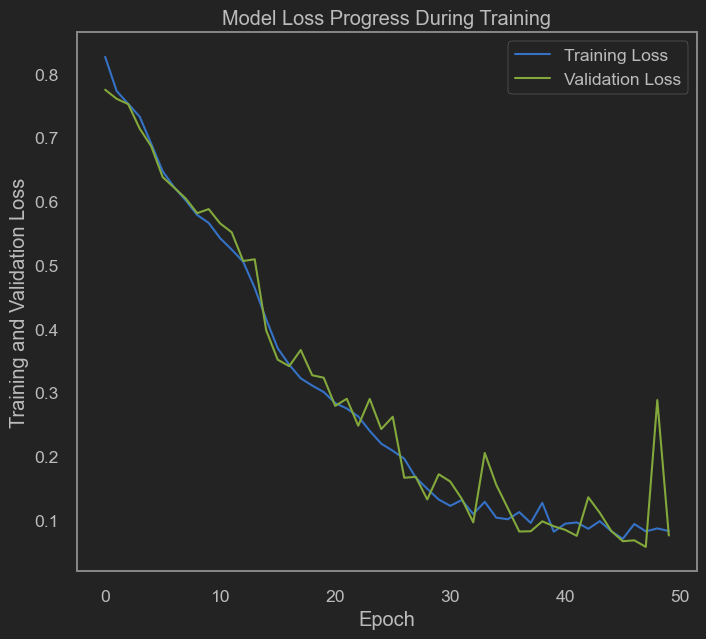

In [103]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

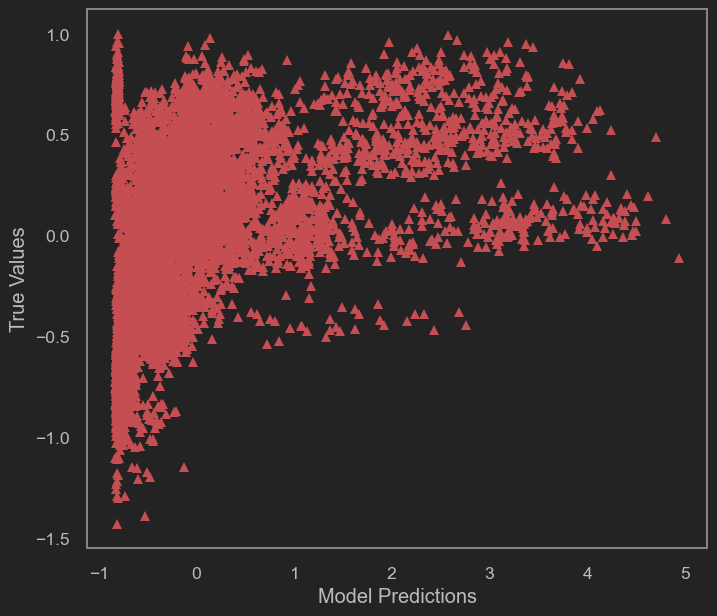

In [104]:

plt.plot(y_test, y_pred, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [105]:
y_predict_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

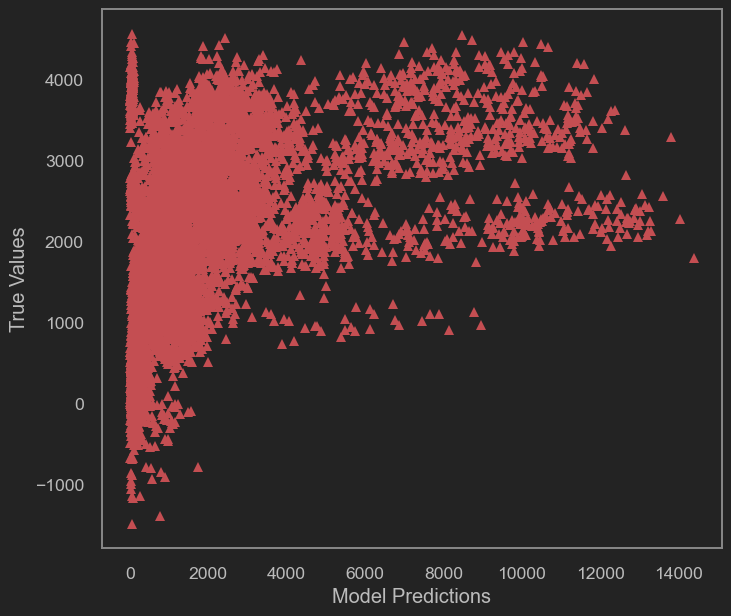

In [106]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [107]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 2242.194 
MSE = 5027433.5 
MAE = 1464.51220703125 
R2 = 0.19829285144805908 
Adjusted R2 = 0.19658436524975975
